In [1]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    import imp

In [2]:
import NeuralNetwork as nn
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import random

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-

# Data

In [4]:
data = np.genfromtxt("data/train_small.csv", delimiter=",", skip_header=1, dtype=float)
# data = data[:50]
# data = np.genfromtxt("data/generated_dataset.csv", delimiter=",", skip_header=1, dtype=float)
print(data.shape)

(999, 785)


In [5]:
X = data[:,1:]
X = X.reshape((X.shape[0],28,28,1))
Y = data[:,0]

print(X.shape)
print(Y.shape)

(999, 28, 28, 1)
(999,)


### normalize

In [6]:
X /= np.max(X)
print(X.shape)

(999, 28, 28, 1)


### one-hot encoding

In [7]:
Y = Y.astype(dtype=int)
tempY = np.zeros(shape=(len(Y), np.max(Y)+1))
tempY[np.arange(len(Y)),Y] = 1
Y = tempY
print(Y.shape)

(999, 10)


### train/validation split

In [8]:
Xtr, Xva, Ytr, Yva = model_selection.train_test_split(X, Y, train_size=.80, random_state=0)

print(Xtr.shape)
print(Ytr.shape)

(799, 28, 28, 1)
(799, 10)


C:\Users\caojo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Building the model

In [31]:
model = nn.NeuralNetwork(input_shape = Xtr.shape[1:], lr=0.01, loss=nn.LossFunction.CrossEntropy())
model.add_layer(nn.Layer.ConvolutionalLayer, filter_size = (2,2), num_filters = 8)
model.add_layer(nn.Layer.Relu)
model.add_layer(nn.Layer.FlattenLayer)
model.add_layer(nn.Layer.FullyConnectedLayer, num_neurons = 32)
model.add_layer(nn.Layer.Relu)
model.add_layer(nn.Layer.FullyConnectedLayer, num_neurons = 10)
model.add_layer(nn.Layer.Softmax)

In [39]:
model.train(Xtr, Ytr, Xva, Yva, epochs=20, batch_size=32)

epoch # 0 :
	Training Accuracy:  0.7884856070087609
	Validation Accuracy:  0.83
	Training loss:  0.9271221094736484
	validation loss:  0.8840913774425303
epoch # 1 :
	Training Accuracy:  0.7847309136420526
	Validation Accuracy:  0.83
	Training loss:  0.934136387245821
	validation loss:  0.889030765822655
epoch # 2 :
	Training Accuracy:  0.772215269086358
	Validation Accuracy:  0.79
	Training loss:  0.9107748453667767
	validation loss:  0.9153697659234606
epoch # 3 :
	Training Accuracy:  0.804755944931164
	Validation Accuracy:  0.79
	Training loss:  0.876187713987238
	validation loss:  0.8718047862932401
epoch # 4 :
	Training Accuracy:  0.8122653316645807
	Validation Accuracy:  0.835
	Training loss:  0.868056459899386
	validation loss:  0.8491949986566134
epoch # 5 :
	Training Accuracy:  0.818523153942428
	Validation Accuracy:  0.835
	Training loss:  0.8294957735972528
	validation loss:  0.8011683660943502
epoch # 6 :
	Training Accuracy:  0.8247809762202754
	Validation Accuracy:  0.87
	

In [11]:
predict_va = model.predict(Xva)

Predicting 5 with 0.11425996444845025 confidence


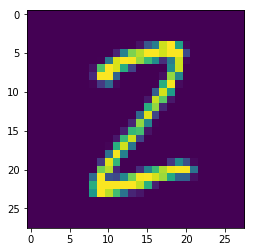

In [12]:
num = random.randint(0, len(Xva))
plt.imshow(np.reshape(Xva[num], (28,28)))
p = predict_va[num]
max_index = np.argmax(p)
print ("Predicting", max_index, "with", p[max_index], "confidence")

# Tensorflow Comparison

In [37]:
tf_model = tf.keras.models.Sequential()
tf_model.add(tf.layers.Conv2D(8, (2, 2), input_shape=(28, 28, 1),  activation=tf.nn.relu))
tf_model.add(tf.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))

tf_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
                 loss = tf.keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [38]:
tf_model.fit(Xtr, Ytr, validation_data=(Xva, Yva), epochs = 20, batch_size = 32)

Train on 799 samples, validate on 200 samples
Epoch 1/20
799/799 [==============================] - 1s 718us/step - loss: 2.1445 - acc: 0.2691 - val_loss: 1.9195 - val_acc: 0.4400
Epoch 2/20
799/799 [==============================] - 0s 241us/step - loss: 1.8018 - acc: 0.5494 - val_loss: 1.5797 - val_acc: 0.6500
Epoch 3/20
799/799 [==============================] - 0s 228us/step - loss: 1.4956 - acc: 0.6696 - val_loss: 1.2690 - val_acc: 0.7600
Epoch 4/20
799/799 [==============================] - 0s 232us/step - loss: 1.2201 - acc: 0.7272 - val_loss: 1.0165 - val_acc: 0.7700
Epoch 5/20
799/799 [==============================] - 0s 227us/step - loss: 1.0001 - acc: 0.7484 - val_loss: 0.8461 - val_acc: 0.8000
Epoch 6/20
799/799 [==============================] - 0s 226us/step - loss: 0.8268 - acc: 0.7847 - val_loss: 0.7099 - val_acc: 0.8200
Epoch 7/20
799/799 [==============================] - 0s 228us/step - loss: 0.7038 - acc: 0.8173 - val_loss: 0.6160 - val_acc: 0.8600
Epoch 8/20
799/7

In [15]:
tf_predict_va = tf_model.predict(Xva)

Predicting 6 with 0.98584044 confidence


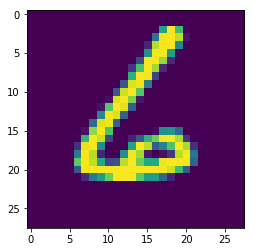

In [16]:
num = random.randint(0, len(Xva))
plt.imshow(np.reshape(Xva[num], (28,28)))
p = tf_predict_va[num]
max_index = np.argmax(p)
print ("Predicting", max_index, "with", p[max_index], "confidence")